In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

### Data cleaning

Some useful functions

In [3]:
def plot_feature_graphs(y, x):
    """plot scatter graphs of the features (used to visualize which regression method would be best)"""
    #colors = ['blue' if y[i] == 1 else 'green' for i in range(y.shape[0])]
    fig = plt.figure(figsize=(30, 30))
    ax_ls = []
    for k in range(6):
        for i in range(5):
            n = k * 5 + i
            ax_ls.append(plt.subplot2grid((6, 6), (k, i)))
            ax_ls[n].scatter(x.T[n], y) #c=colors)
            ax_ls[n].set_xlabel(labels[n])
    plt.show()


def plot_feature_boxplots(data):
    """plot boxplots of values for all features (useful to study their distributions)"""
    fig = plt.figure(figsize=(30, 30))
    ax_ls = []
    for k in range(6):
        for i in range(5):
            n = k * 5 + i
            ax_ls.append(plt.subplot2grid((6, 6), (k, i)))
            ax_ls[n].boxplot(data=data.T, x=data.T[n])
            ax_ls[n].set_xlabel(labels[n])
    plt.show()


def plot_histograms(data):
    """plot histogram of all features in data"""
    fig = plt.figure(figsize=(30, 30))
    for ind, col in enumerate(data.T):
        k = int(ind / 5)
        i = ind % 5
        plt.subplot2grid((6, 6), (k, i))
        plt.hist(col, bins='auto')
        plt.title(labels[ind])
    plt.show()


In [4]:
# Get label names
labels = []
with open('../data/train.csv', 'r') as f:
    labels = f.readline().rstrip()
labels = labels.split(',')[2:] # remove first two columns (which are ID and prediction respectively)
print(len(labels))

lab_dict = {}
for ind, lab in enumerate(labels):
    lab_dict.update({lab: ind})

30


Get an idea of the distribution of the data:

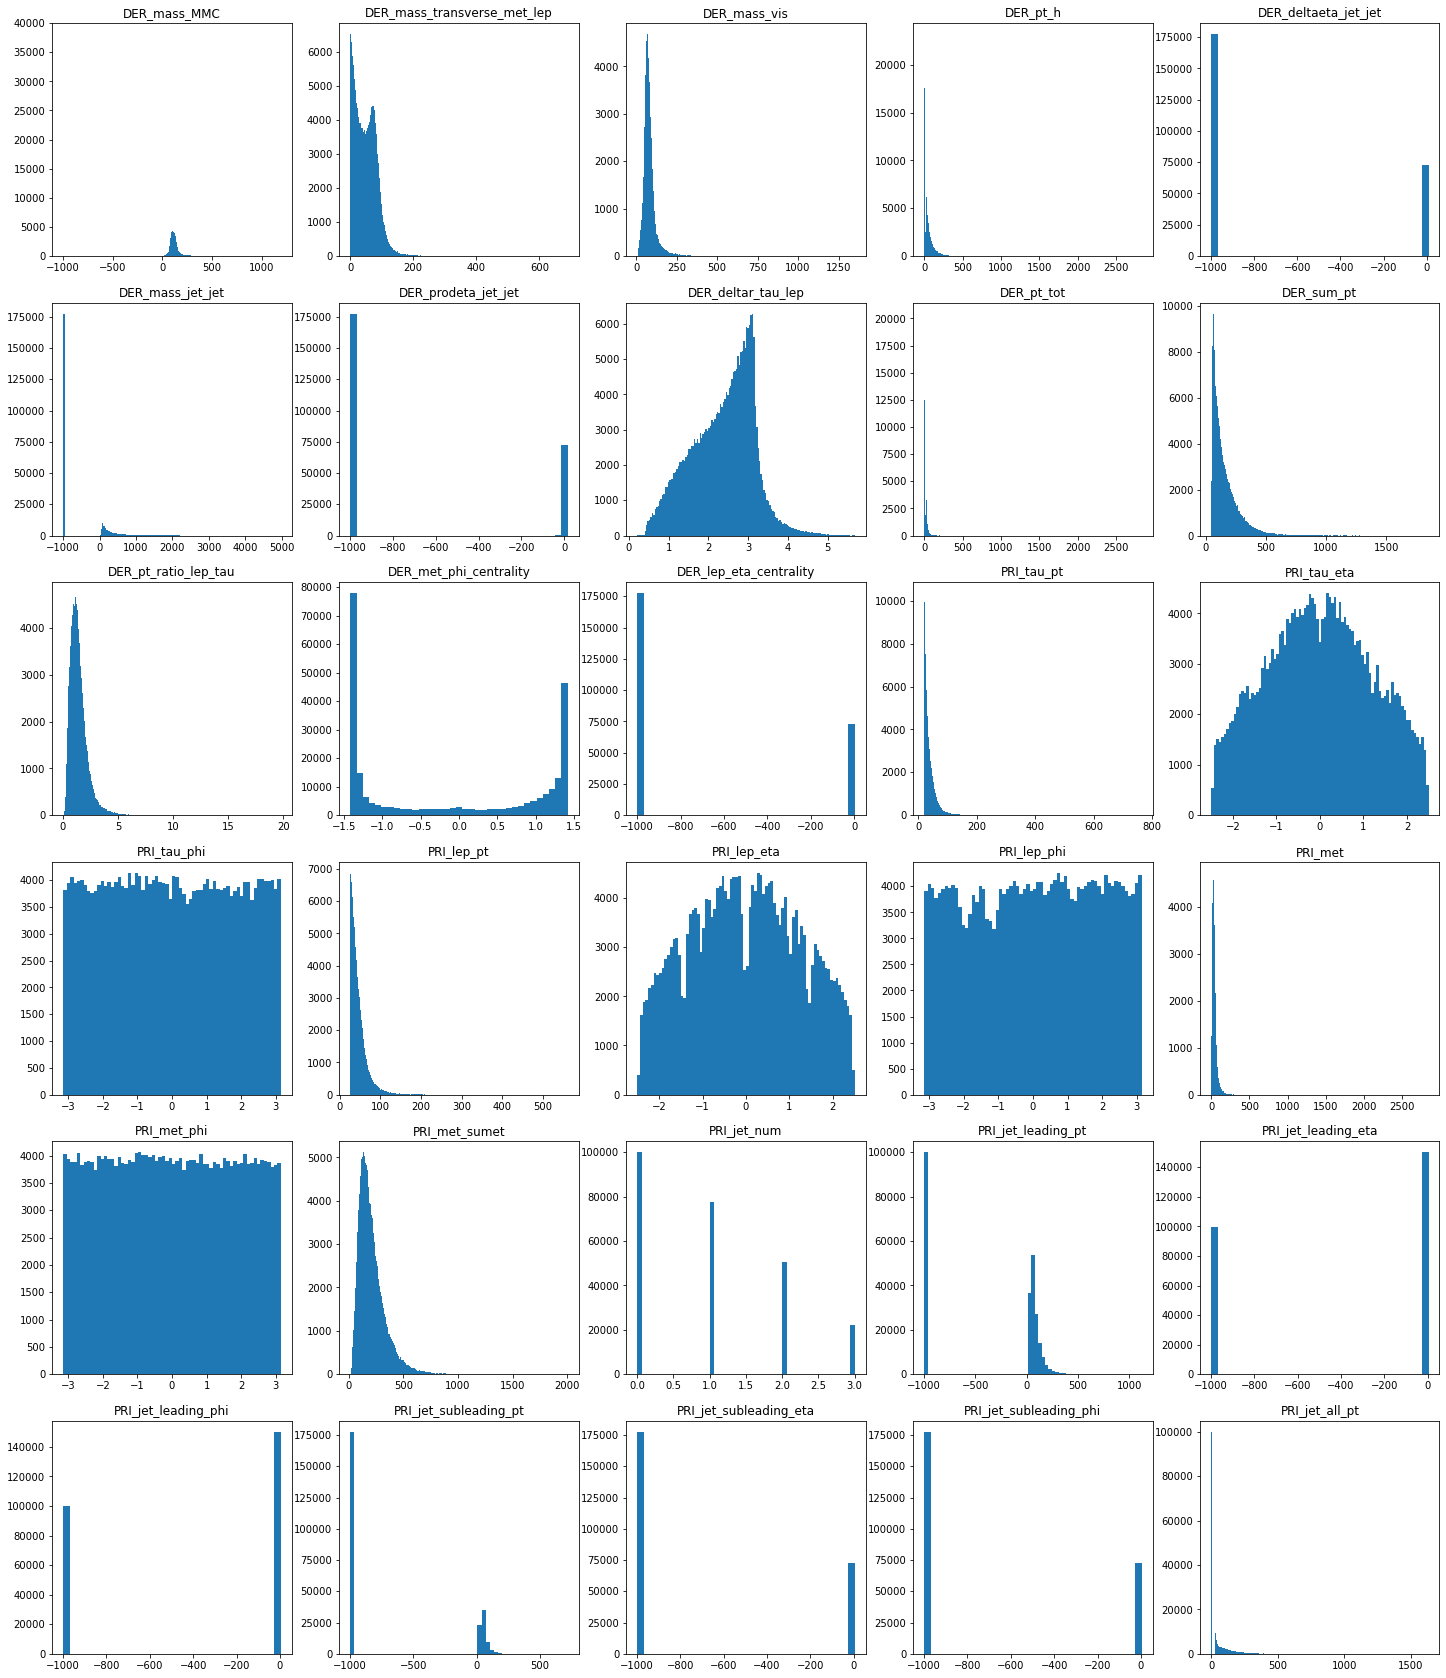

In [5]:
plot_histograms(tX)

We notice that many of these histograms have many elements with the value `-999.0`. This corresponds to the in-dataset NaN value, i.e. missing values. Furthermore, the `PRI_jet_num` feature is discrete, and divides the dataset into 4 categories. <br>This could be useful for classifying signal vs background datapoints more accurately. For instance, we could split the dataset into 4 categories, and train 4 different models on the data. Then, given a test set, we could split the set similarly and perform predictions using the appropriate model. Furthermore, we may be able to clean the data (i.e. replacing missing values with plausible ones) more easily, given more precise distributions entailed by a more specific subset of the data.

In [6]:
jet_cat = [0, 1, 2, 3]
y_cats = []
tx_cats = []
for i in jet_cat:
    indexes = np.where(tX[:, lab_dict['PRI_jet_num']] == i)
    y_cats.append(y[indexes])
    tx_cats.append(tX[indexes])


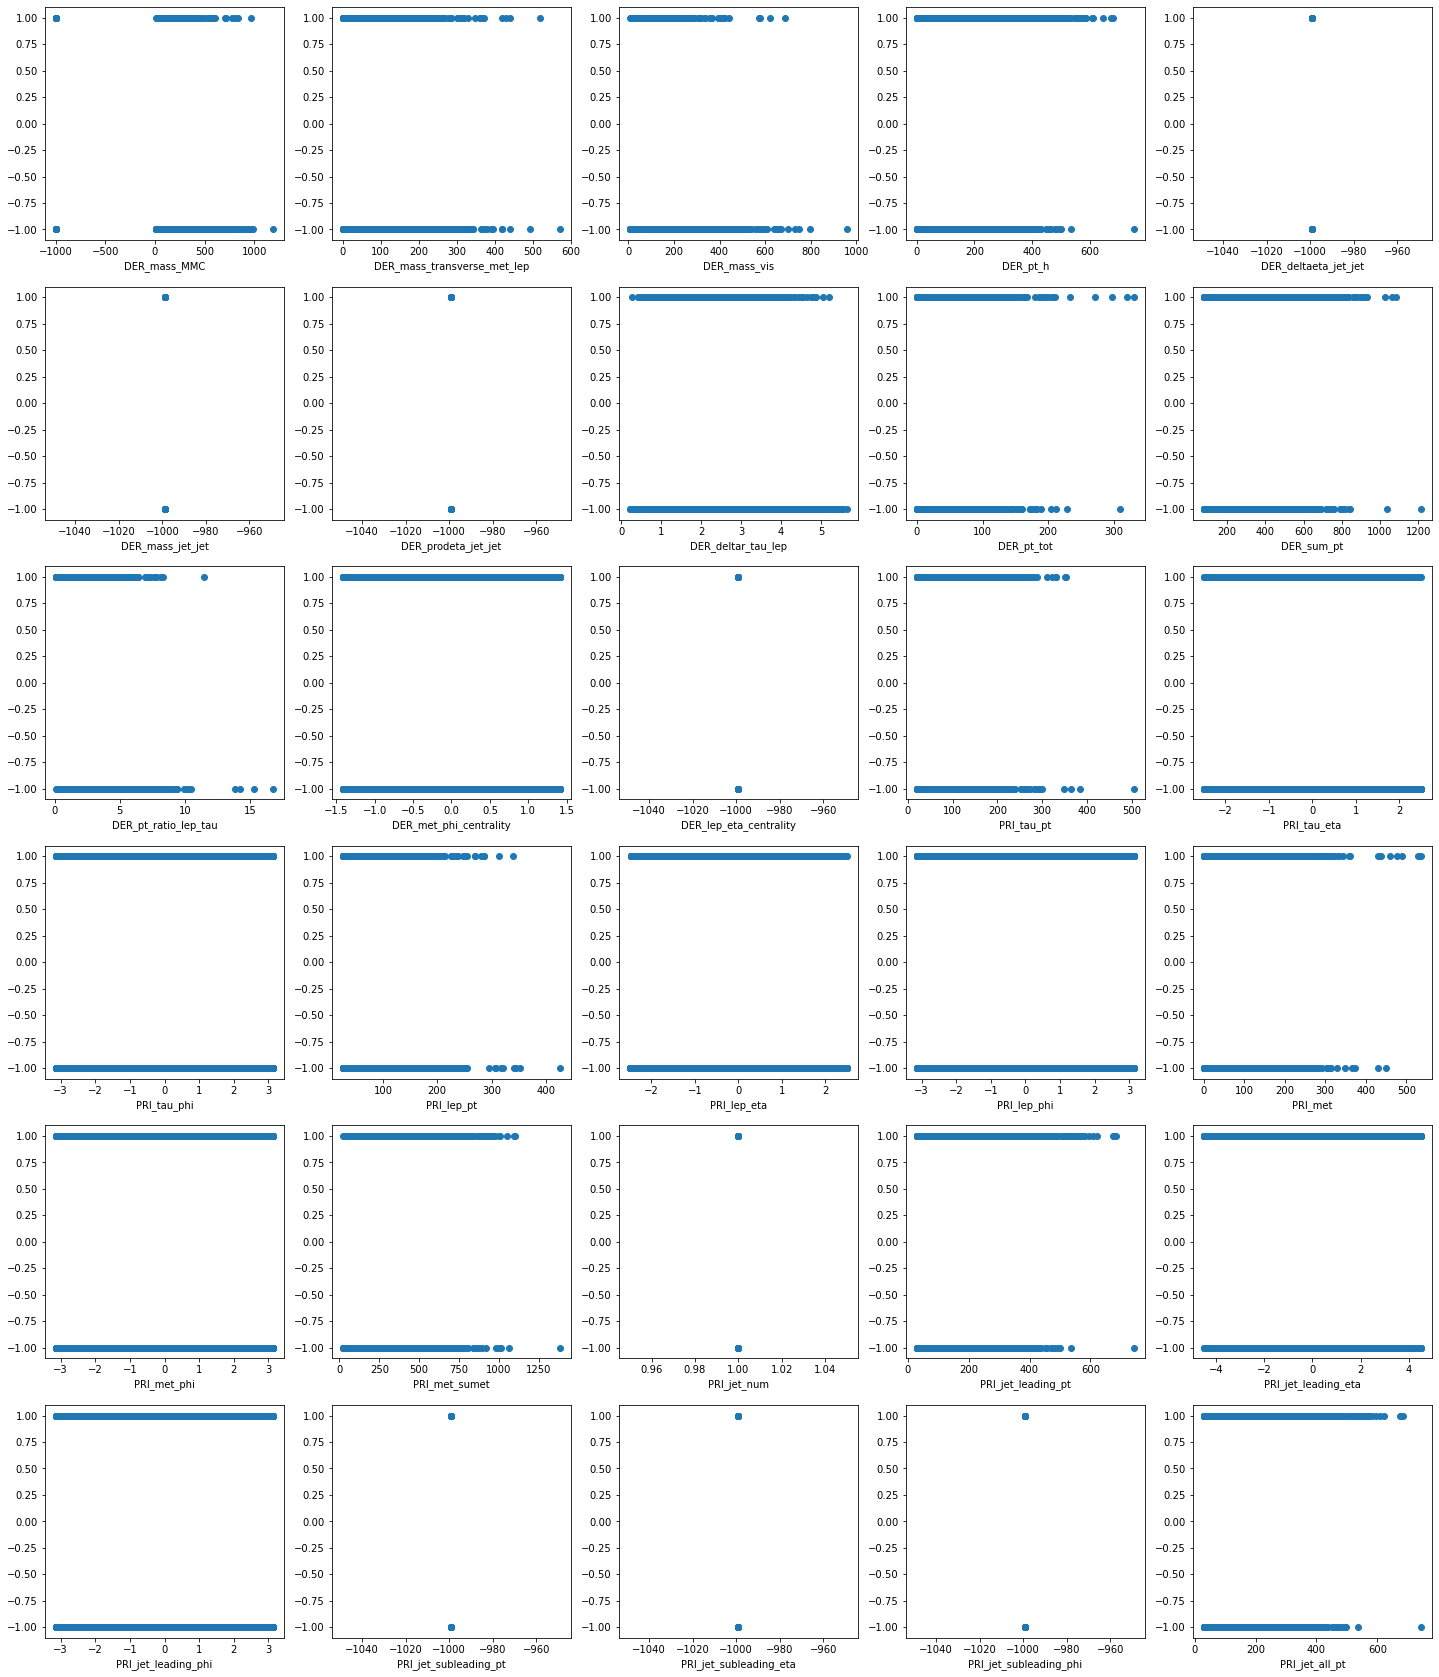

In [7]:
#for i in jet_cat:
#    plot_feature_graphs(y_cats[i], tx_cats[i])
plot_feature_graphs(y_cats[1], tx_cats[1])

From the above plots, we notice that when divided into categories, some features become irrelevant to classification (i.e. they all have the same value, which can furthermore be `-999.0`). Therefore, it might be more appropriate to preprocess the data by selecting the appropriate features before beginning training or predictions.

In [8]:
irrelevant_features = {
    0: ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_num',
        'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
        'PRO_jet_subleading_phi', 'PRI_jet_all_pt'],
    1: ['DER_deltaeta_jet_jet', ],
}


# DONT FORGET TO AVERAGE AND NORMALIZE THE DATASET

### Prediction generation

## Generate predictions and save ouput in csv format for submission:

In [9]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [10]:
OUTPUT_PATH = '../output/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined